180688
(6618, 71)


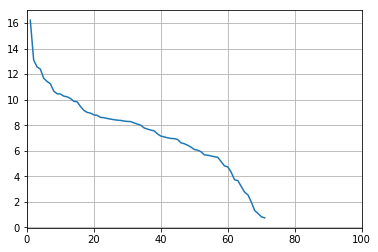

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json
import pandas as pd
import collections
import math

from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
import sklearn.metrics as metrics
%matplotlib inline

lines = []
class category:
    def __init__(self, name, count):
        self.name = name
        self.count = count
    def __str__(self):
        return '{' + self.name + ': ' + self.count
with open('UCB.csv', 'rb') as f:
     lines = [l.decode('utf8', 'ignore') for l in f.readlines()]
print(len(lines))
strs = 'hello'
count = 0
category_dic = {}
#for line in lines[1:]:
#    arr = line.split(',')
#    if len(arr) < 8:
#        continue
#    if arr[8] == 'TRUE' and arr[4] and arr[5] and arr[3]:
#        if arr[3] not in category_dic:
#            category_dic[arr[3]] = 1    
#        else:
#            category_dic[arr[3]] += 1
#l = []
#for key in category_dic:
#    l.append(category(key, category_dic[key]))
#l = sorted(l, key = lambda x : x.count, reverse = True)
#for i in l:
#    print(i.name + ', ' + ': ' + str(i.count))

other_name =[]
for line in lines[1:]:
    arr = line.split(',')
    if len(arr) < 8:
        continue
    if arr[3] =='OTHER: Type in Description' and arr[8] == 'TRUE' and arr[4] and arr[5] and arr[3]:
        other_name.append([arr[0],arr[10]])
#print(other_name)        
desc = pd.DataFrame(other_name,columns = ['ID','name'])
#print(desc)

vectorizer = TfidfVectorizer(stop_words='english',min_df=0.01,max_df=0.99)
review = vectorizer.fit_transform(desc.name)
terms = vectorizer.get_feature_names()
print(review.shape)

rev_dense = review.todense()
centered_rev = rev_dense - np.mean(rev_dense, axis=0)
u, s, vt = np.linalg.svd(centered_rev, full_matrices=False)
 
plt.xlim([0,100])
plt.grid()
plt.plot(range(1,len(s)+1),s,label='review10')



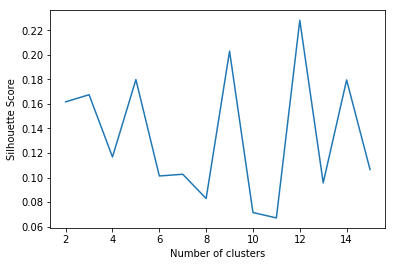

In [8]:
# the below function evaluates the Silhouette Coefficient
#and is referenced from professor's lecture notes 07-Clustering-II Silhouette Coefficient
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    
sc_evaluate_clusters(u,15)


In [11]:
#Based on the above plot, I choose k to be 5.
import matplotlib.patches as mpatches
#Kmeans cluster to 5 clusters, review k = 10
kmeans = KMeans(init='k-means++', n_clusters=12, n_init=100)
km_pred10 = kmeans.fit_predict(u)
ori_centers = kmeans.cluster_centers_[:,:10] @ vt[:10,:]
order10 = ori_centers.argsort()[:, ::-1]
#Match the label for clusters
lb = []
for c in range(1,13):
    tmp = []
    for index in order10[c-1,:12]:
        index = np.array(index)
        for j in index[0]:
            tmp.append(terms[j])
    lb.append(tmp)
#Plot the cluster result
for i in lb:
    print(i)

['place', 'class', 'rosie', 'lunch', 'women', 'rosies', 'breakfast', 'wlp', 'program', 'pl', 'home', 'autism']
['kids', 'story', 'time', 'took', 'park', 'program', 'mi', 'hijo', 'party', 'terapia', 'autism', 'practice']
['en', 'meeting', 'boston', 'food', 'school', 'group', 'class', 'la', 'family', 'lunch', 'pantry', 'women']
['boston', 'family', 'kids', 'night', 'story', 'time', 'carol', 'day', 'program', 'center', 'party', 'took']
['class', 'program', 'wlp', 'home', 'dsni', 'family', 'autism', 'greenhouse', 'soccer', 'rosies', 'specialized', 'fp']
['class', 'family', 'boston', 'program', 'home', 'night', 'autism', 'wlp', 'carol', 'rosies', 'dsni', 'greenhouse']
['group', 'support', 'community', 'parent', 'park', 'center', 'cole', 'anna', 'mae', 'real', 'setup', 'breakdown']
['survey', 'ucb', 'sign', 'tutoria', 'night', 'dsni', 'greenhouse', 'practice', 'james', 'otis', 'study', 'fp']
['survey', 'ucb', 'sign', 'family', 'night', 'boston', 'tutoria', 'carol', 'dsni', 'otis', 'greenhous